# Problem Set 1, due Jan 26th at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [389]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       8.2.0 (need at least 1.0)
Numpy version:        1.21.5 (need at least 1.7.1)
SciPy version:         1.7.3 (need at least 0.12.0)
Pandas version:        1.4.2 (need at least 0.11.0)
Maplotlib version:     3.5.1 (need at least 1.2.1)
Scikit-Learn version:  1.0.2 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Peter Amerkhanian*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [390]:
from sklearn.datasets import load_boston
bdata = load_boston()

/Users/jaredschober/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

The following commands will provide some basic information about the shape of the data:

In [391]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted

In [392]:
boston = pd.DataFrame(bdata.data)

In [393]:
boston.columns = bdata.feature_names[:]
print(boston.shape)
print( bdata.target )

(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 5

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [394]:
# enter your code here

# 1.1.1
print(boston.head())
print(boston.shape)

# 1.1.2
print(boston[boston['CHAS']==1.0].shape[0])

# 1.1.3
print(boston.isnull().sum())

# 1.1.4
data = pd.DataFrame(bdata.target)
data.columns = ['MEDV']
data = data.reset_index()
data
boston_join = boston.reset_index()
joined_df = boston_join.merge(data, left_on='index', right_on='index')
joined_df = joined_df.drop(labels='index', axis=1)
joined_df.sort_values(by='MEDV', ascending=False).head()['TAX']

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
(506, 13)
35
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64

*Provide our answers below:*

 - 1.1.1: *There are 14 variables (including MEDV), with 506 observations*
 - 1.1.2: *There are 35 instances of neighborhoods classified as bounding the Charles River*
 - 1.1.3: *The query boston.isnull().sum() counts all null values for each variable. Since the sum for each variable is 0, we know there are no missing values in the dataset.*
 - 1.1.4: *The property tax rates in the 5 neighborhoods with the highest median housing price are: 198, 307, and 666 (for numbers 3-5) per 10,000*

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [395]:
# enter your code here

# 1.2.1
print(joined_df.sort_values(by='MEDV', ascending=False)['MEDV'].head(1))

# 1.2.2
print(joined_df[joined_df['RM']<5.0]['RM'].count())

# 1.2.3
print(joined_df[joined_df['CHAS']==1.0].sort_values(by='MEDV', ascending=False).head(1)['TAX'])

# 1.2.4
print(joined_df.sort_values(by='MEDV', ascending=False).head(1)['CRIM'])

# 1.2.5
print(joined_df.sort_values(by='MEDV', ascending=False).tail(1)['CRIM'])

283    50.0
Name: MEDV, dtype: float64
15
372    666.0
Name: TAX, dtype: float64
283    0.01501
Name: CRIM, dtype: float64
405    67.9208
Name: CRIM, dtype: float64


*Provide our answers below:*

 - 1.2.1: *The median housing price in Boston's most expensive neighborhood is 50,000*
 - 1.2.2: *15 neighborhoods have on average less than 5 rooms per dwelling*
 - 1.2.3: *The property tax rate in the most expensive neighborhood that is also adjacent to the Charles River is 666 per 10k*
 - 1.2.4: *The per capita crime rate in the neighborhood with the highest median housing price is 0.015*
 - 1.2.5: *The per capita crime rate in the neighborhood with the lowest median housing price is 67.92*

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [396]:
# enter your code here
table = joined_df.keys().to_frame()
table['Non-missing values'] = joined_df.count() - joined_df.isnull().sum()
table['Mean'] = joined_df.describe().loc['mean', :]
table['STD'] = joined_df.describe().loc['std', :]
table['Min'] = joined_df.describe().loc['min', :]
table['Median'] = joined_df.describe().loc['50%', :]
table['Max'] = joined_df.describe().loc['max', :]
table = table.drop(0, axis=1)
table

,Non-missing values,Mean,STD,Min,Median,Max
CRIM,506,3.613524,8.601545,0.00632,0.25651,88.9762
ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [397]:
# enter your code here
sp.stats.ttest_ind(joined_df[joined_df['CHAS']==1.0]['MEDV'], joined_df[joined_df['CHAS']==0.0]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

*Our ttest returned a t-statistic of 3.996, which corresponds to a p-value of approximately .00739. Since our p value is less than p=0.05, we can reject the null hypothesis that prices are equivalent in neighborhoods adjacent to the Charles River and those that are not adjacent.*

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


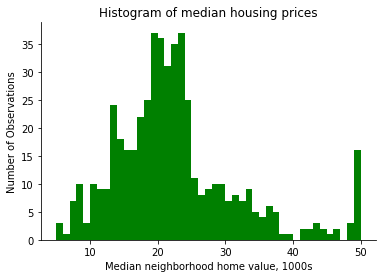

In [398]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
binwidth = 1 # width of 1 because that represents 1000 in the data
ax = plt.subplot(111)
ax.hist(bdata.target, \
         bins=range(int(min(bdata.target)), int(max(bdata.target))+binwidth, binwidth), \
         color='green')
ax.set_xlabel("Median neighborhood home value, 1000s")
ax.set_ylabel("Number of Observations")
ax.set_title("Histogram of median housing prices")
ax.spines[['right', 'top']].set_visible(False)


### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


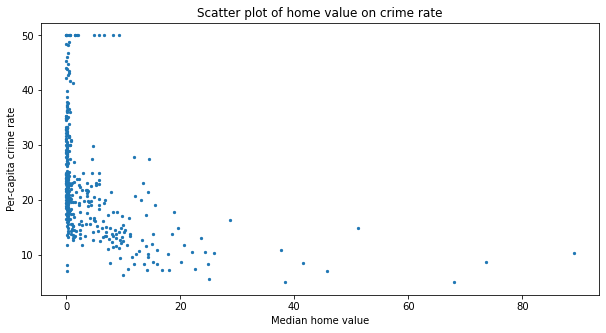

In [399]:
# enter your code here
plt.figure(figsize=(10,5))
plt.scatter(joined_df['CRIM'], joined_df['MEDV'], s=5)
plt.xlabel('Median home value')
plt.ylabel('Per-capita crime rate')
plt.title("Scatter plot of home value on crime rate");

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

In [400]:
# Calculating correlation
joined_df['MEDV'].corr(joined_df['CRIM'])

-0.3883046085868113

*Write your thoughts here (1-2 paragraphs).*

*From the above scatter plot, it's clear that there is some relationship between median neighborhood home value and per capita crime rates. Rates are certainly higher in neighborhoods with lower home values, and lower in neighborhoods with higher home values. However, this effect seems to disappear by the time you reach ~$25k median home value.*

*The correlation between crime rates and housing prices in Boston is -0.3883. This makes sense because crime rates tend to decrease as home values incrase. I think this relationship is likely causal because of probable demographic differences between people who live in rich vs. poor neighborhoods. If you live in a poor neighborhood, there are likely to be more people in financial duress, which may cause them to commit crime, whereas richer, more expensive neighborhoods likely have a filtering effect, effectively preventing people who might be more likely to commit crime from living there.*

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

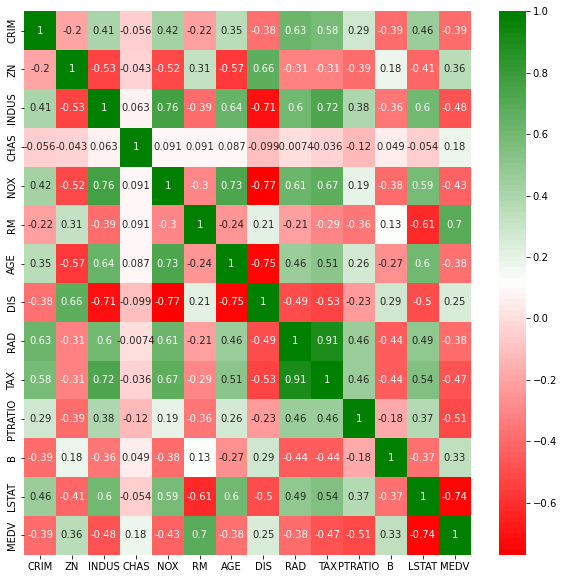

In [401]:
# enter your code here
import seaborn as sns
plt.figure(figsize=(10,10))
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=100) 
matrix = joined_df.corr()
sns.heatmap(matrix, annot=True, cmap=cmap)
plt.show()

*The variables that appear most positively correlated (besides a variable with itself) are "RAD" and "TAX," which means that access to radial highways is positively correlated with a higher tax rate. The most negatively correlated variables are "NOX" and "DIS," which indicates that as distance to Boston's five business centers increases, the nitric oxide concentration decreases. In other words, the business centers are assocaited with high nitric oxide concentrations.*

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

In [402]:
joined_df['ROUND TAX'] = (joined_df['TAX'] / 100).astype(int) *100
# joined_df['ROUND TAX'] = round(joined_df['TAX'],-2)
joined_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,ROUND TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,200
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,200
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,200
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,200
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,200
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,200
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,200
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,200


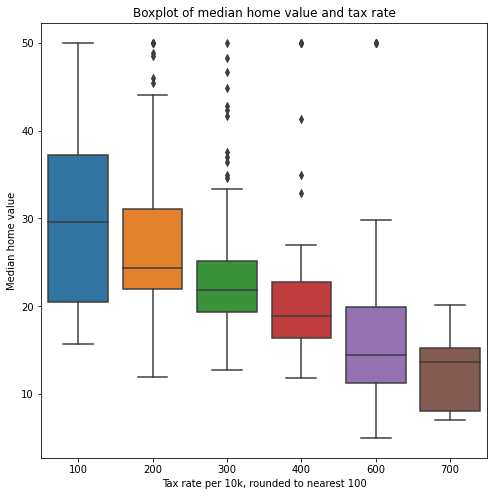

In [403]:
# enter your code here
plt.figure(figsize=(8,8))
sns.boxplot(x=joined_df['ROUND TAX'], y=joined_df['MEDV'])
plt.title("Boxplot of median home value and tax rate")
plt.xlabel("Tax rate per 10k, rounded to nearest 100")
plt.ylabel("Median home value");

*Interestingly, it appears that the median home value decreases as tax rates increase. This implies that taxes are applied regressively (e.g. poorer people pay higher tax rates), rather than progressively.*